In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_total = pd.read_csv('cases-brazil-states-att.csv')
df_total = df_total[df_total['state'] == 'SP']
df_total = df_total.rename(columns={'date':'data','newDeaths':'ObitosDiarios'})
df_total.head()

,epi_week,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [3]:
df_total['data'] = pd.to_datetime(df_total['data'], format='%Y-%m-%d')
df_total.index = df_total['data']
df_total.head()

,epi_week,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [4]:
df_total2 = df_total
df_total = df_total[0:300]
df_total.tail()

,epi_week,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2020-12-16,51,2020-12-16,Brazil,SP,TOTAL,0,44282,0,1341428,44282,1341428,96.43492,2921.28872,0.03301,1189305.0,NaN,6336829.0,13800.00052
2020-12-17,51,2020-12-17,Brazil,SP,TOTAL,399,44681,20303,1361731,44681,1361731,97.30384,2965.50349,0.03281,1189305.0,NaN,6336829.0,13800.00052
2020-12-18,51,2020-12-18,Brazil,SP,TOTAL,197,44878,9922,1371653,44878,1371653,97.73286,2987.11108,0.03272,1195792.0,NaN,6336829.0,13800.00052
2020-12-19,51,2020-12-19,Brazil,SP,TOTAL,151,45029,12447,1384100,45029,1384100,98.06170,3014.21748,0.03253,1196775.0,NaN,6336829.0,13800.00052
2020-12-20,52,2020-12-20,Brazil,SP,TOTAL,0,45029,0,1384100,45029,1384100,98.06170,3014.21748,0.03253,1205561.0,NaN,6336829.0,13800.00052


In [5]:
y = df_total['ObitosDiarios']
y

data
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
             ... 
2020-12-16      0
2020-12-17    399
2020-12-18    197
2020-12-19    151
2020-12-20      0
Name: ObitosDiarios, Length: 300, dtype: int64

In [6]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [7]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [8]:
import statsmodels.api as sm
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        aic_list.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Convergenc

In [13]:
aic_list

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC4017.1944378824282',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3759.9849845634953',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3285.0200137893753',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3234.8580077621878',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3368.809788089212',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3323.05091954185',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC3238.598590303846',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC3234.314289996466',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3840.1363160919373',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3666.397053350245',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3286.363601407953',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3236.51040886773',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC3370.7699981745764',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3324.2274661523907',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3240.500239529436',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3236.1545294039074',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3712.2554406569598',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC3610.951122060185',
 'A

/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/sara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


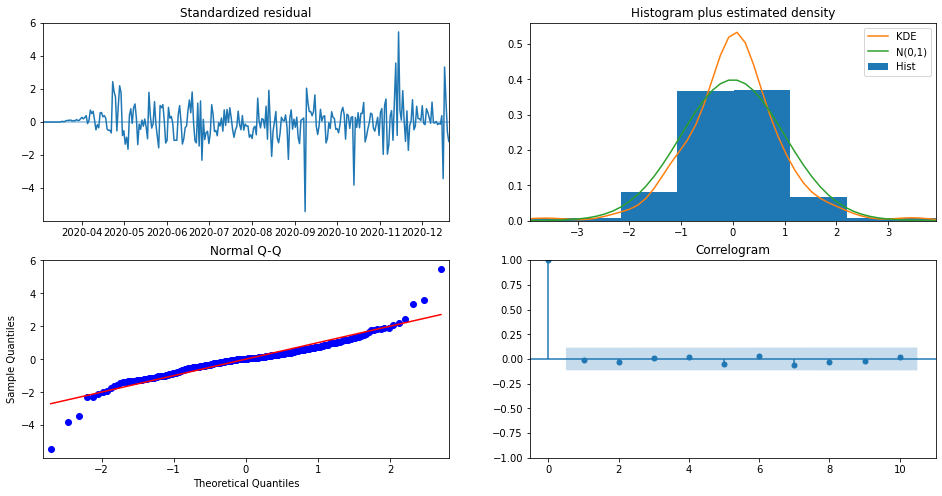

In [16]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order = (0,1,1,7))
results = mod.fit()
results.plot_diagnostics(figsize=(16,8))
plt.show()

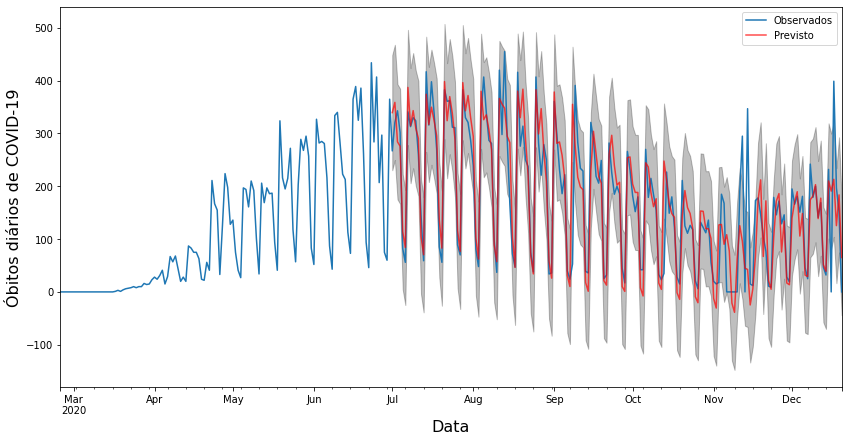

In [27]:
plt.figure(figsize=(14,7))
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='Observados')
pred.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k',alpha=0.25)
plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19',fontsize=16)
plt.show()

Text(0, 0.5, 'Óbitos diários de COVID-19')

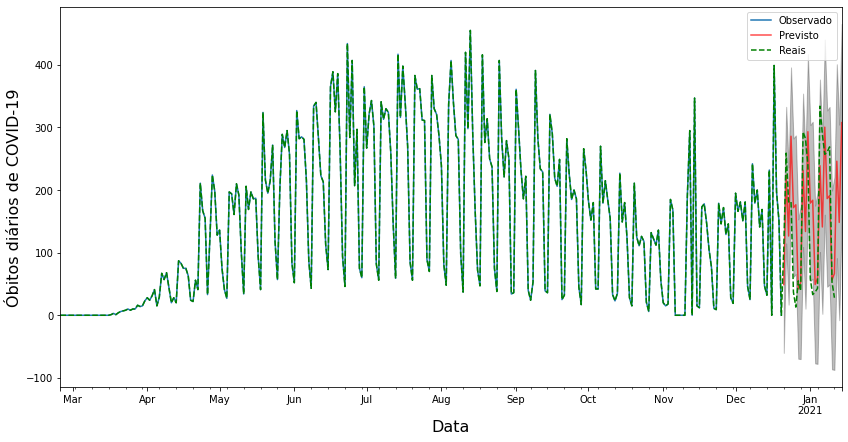

In [37]:
pred_uc = results.get_forecast(steps = 25)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observado',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1],color='k',alpha=0.25)
fig = plt.plot(x,linestyle='--',color='green',label='Reais')

plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19',fontsize=16)

In [29]:
df_total2.tail()

,epi_week,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2021-01-07,101,2021-01-07,Brazil,SP,TOTAL,257,47768,14073,1515158,47768,1515158,104.02654,3299.62844,0.03153,1336589.0,NaN,7025614.0,15299.99892
2021-01-08,101,2021-01-08,Brazil,SP,TOTAL,261,48029,13794,1528952,48029,1528952,104.59494,3329.66826,0.03141,1340014.0,NaN,7025614.0,15299.99892
2021-01-09,101,2021-01-09,Brazil,SP,TOTAL,269,48298,11561,1540513,48298,1540513,105.18075,3354.84518,0.03135,1350513.0,NaN,7025614.0,15299.99892
2021-01-10,102,2021-01-10,Brazil,SP,TOTAL,53,48351,5619,1546132,48351,1546132,105.29617,3367.08193,0.03127,1360789.0,NaN,7025614.0,15299.99892
2021-01-11,102,2021-01-11,Brazil,SP,TOTAL,28,48379,3010,1549142,48379,1549142,105.35715,3373.63694,0.03123,1370112.0,NaN,7025614.0,15299.99892


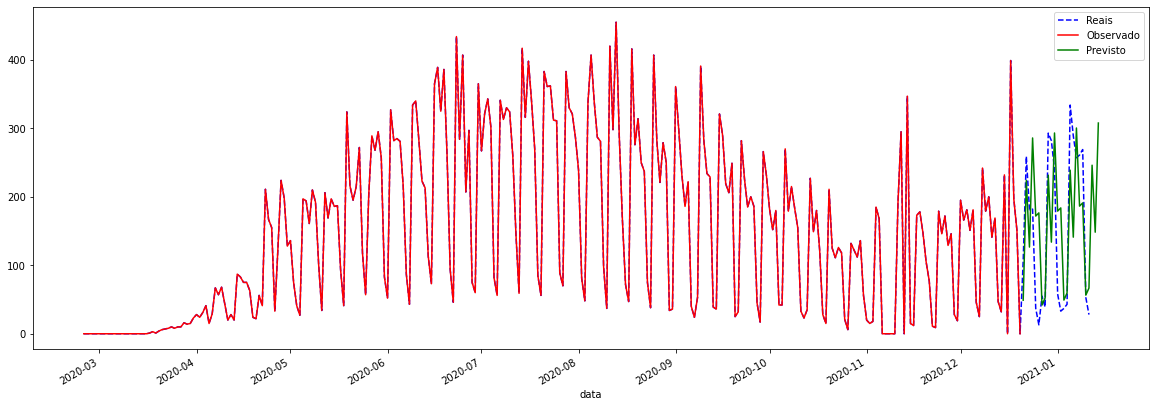

In [34]:
x = df_total2['ObitosDiarios']
plt.figure(figsize=(20,7))
fig = plt.plot(x,linestyle='--',color='b',label='Reais')
ax = y.plot(label='Observado', color='red')
pred_uc.predicted_mean.plot(ax=ax, color='green', label='Previsto')
#ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1],color='k',alpha=0.25)
plt.legend()